# Exploratory Data Analyis IMDB Movies

## What is IMDb ?

##### IMDb, short for Internet Movie Database, is an online repository that houses a vast collection of information related to movies, TV shows, podcasts, home videos, video games, and streaming content. It provides details such as cast and crew information, personal biographies, plot summaries, trivia, ratings, as well as fan and critical reviews. Initially established by fans on the Usenet group "rec.arts.movies" in 1990, IMDb transitioned to the internet in 1993. Since 1998, it has been under the ownership and operation of IMDb.com, Inc., a subsidiary of Amazon.

##### As of March 2022, the database encompasses approximately 10.1 million titles, including television episodes, and boasts 11.5 million records of individuals. Furthermore, the site has amassed an impressive user base of 83 million registered users. The platform's message boards were disabled in February 2017.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# About this file

##### The IMDB dataset contains information about movies, including their names, release dates, user ratings, genres, overviews, cast and crew members, original titles, production status, original languages, budgets, revenues, and countries of origin. This data can be used for various analyses, such as identifying trends in movie genres, exploring the relationship between budget and revenue, and predicting the success of future movies.

##  Outline of EDA
### We shall perform the following steps:

##### - Preview data
##### - Check total number of entries and column types
##### - Check any null values
##### - Check duplicate entries
##### - Plot count distribution of categorical data
##### - Analyse time series of numeric data by daily, monthly and yearly frequencies

In [2]:
# Loading the dataset

Movies = pd.read_csv("/kaggle/input/imdb-movies-dataset/imdb_movies.csv")
Movies.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [3]:
# Number of Rows
print("Number of rows",Movies.shape[0])

# Number of colums
print("number of colums",Movies.shape[1])

Number of rows 10178
number of colums 12


In [4]:
Movies.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10173    False
10174    False
10175    False
10176    False
10177    False
Length: 10178, dtype: bool

In [5]:
Movies.isna().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [6]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [7]:
Movies["date_x"]= pd.to_datetime(Movies["date_x"])

In [8]:
Movies.columns

Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')

In [9]:
Movies.dropna(inplace=True)

In [10]:
Movies.describe().T.style.format('{:,.2F}')

,count,mean,std,min,25%,50%,75%,max
score,"10,052.00",63.83,12.78,0.00,59.00,65.00,71.00,100.00
budget_x,"10,052.00","64,125,276.59","56,658,516.67",1.00,"14,397,627.25","50,000,000.00","104,000,000.00","460,000,000.00"
revenue,"10,052.00","251,204,924.10","276,549,495.18",0.00,"27,687,812.00","149,328,803.80","416,157,754.65","2,923,706,026.00"


In [11]:
matrix=Movies[["revenue","score","budget_x"]].corr()

In [12]:
matrix.style.background_gradient(cmap='Reds', axis=0)

,revenue,score,budget_x
revenue,1.000000,0.090929,0.682766
score,0.090929,1.000000,-0.214374
budget_x,0.682766,-0.214374,1.000000


<AxesSubplot: >

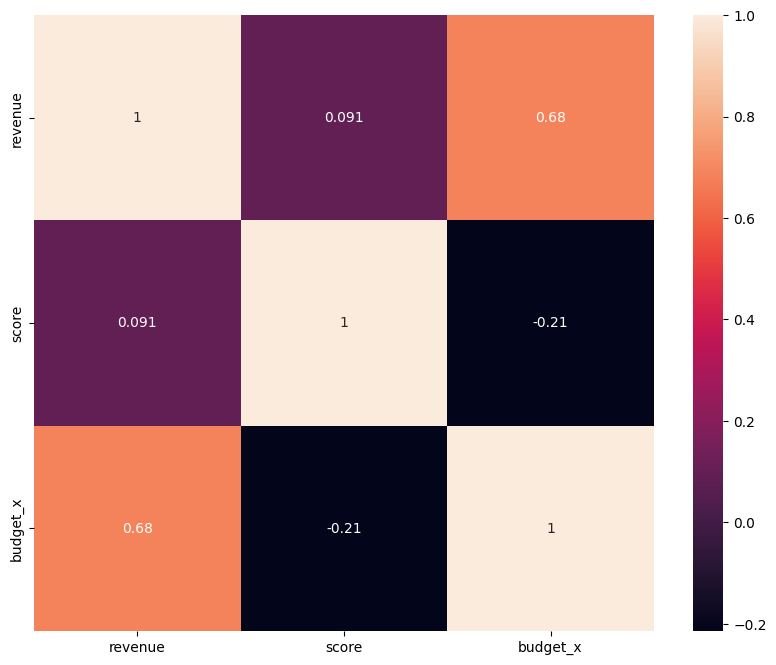

In [13]:
plt.figure(figsize=(10,8))
corr = Movies[["revenue","score","budget_x"]].corr()
sns.heatmap(corr, annot=True)

In [14]:
top_10_revenues = Movies.sort_values("revenue", ascending=True)[-10:]
top_10_revenues

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
2156,BTS: Permission to Dance on Stage - LA,2022-09-08,92.0,"Music, Documentary","Purple colors the city of Los Angeles, as BTS ...","Kim Nam-joon, Self, Kim Seok-jin, Self, Min Yo...",BTS: PERMISSION TO DANCE 온 스테이지 – LA,Released,Korean,215600000.0,1.748017e+09,KR
76,Spider-Man: No Way Home,2021-12-16,80.0,"Action, Adventure, Science Fiction",Peter Parker is unmasked and no longer able to...,"Tom Holland, Peter Parker / Spider-Man, Zenday...",Spider-Man: No Way Home,Released,English,200000000.0,1.910048e+09,AU
104,Avengers: Infinity War,2018-04-25,83.0,"Adventure, Action, Science Fiction",As the Avengers and their allies have continue...,"Robert Downey Jr., Tony Stark / Iron Man, Chri...",Avengers: Infinity War,Released,English,300000000.0,2.048360e+09,AU
943,Star Wars: The Force Awakens,2015-12-17,73.0,"Adventure, Action, Science Fiction, Fantasy",Thirty years after defeating the Galactic Empi...,"Harrison Ford, Han Solo, Mark Hamill, Luke Sky...",Star Wars: The Force Awakens,Released,English,245000000.0,2.068224e+09,AU
4483,Louis Tomlinson: All of Those Voices,2023-03-22,91.0,"Documentary, Music",Ditching the typical glossy sheen of celebrity...,"Louis Tomlinson, Self, Oliver Wright, Louis’ P...",Louis Tomlinson: All of Those Voices,Released,English,178800000.0,2.081794e+09,GB
309,Titanic,1997-12-18,79.0,"Drama, Romance",101-year-old Rose DeWitt Bukater tells the sto...,"Leonardo DiCaprio, Jack Dawson, Kate Winslet, ...",Titanic,Released,English,200000000.0,2.222986e+09,AU
6670,Titanic,1953-04-11,66.0,"Drama, Romance","Unhappily married, Julia Sturges decides to go...","Clifton Webb, Richard Ward Sturges, Barbara St...",Titanic,Released,English,200000000.0,2.222986e+09,US
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
230,Avengers: Endgame,2019-04-24,83.0,"Adventure, Science Fiction, Action",After the devastating events of Avengers: Infi...,"Robert Downey Jr., Tony Stark / Iron Man, Chri...",Avengers: Endgame,Released,English,400000000.0,2.794732e+09,AU
68,Avatar,2009-12-17,76.0,"Action, Adventure, Fantasy, Science Fiction","In the 22nd century, a paraplegic Marine is di...","Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar,Released,English,237000000.0,2.923706e+09,AU


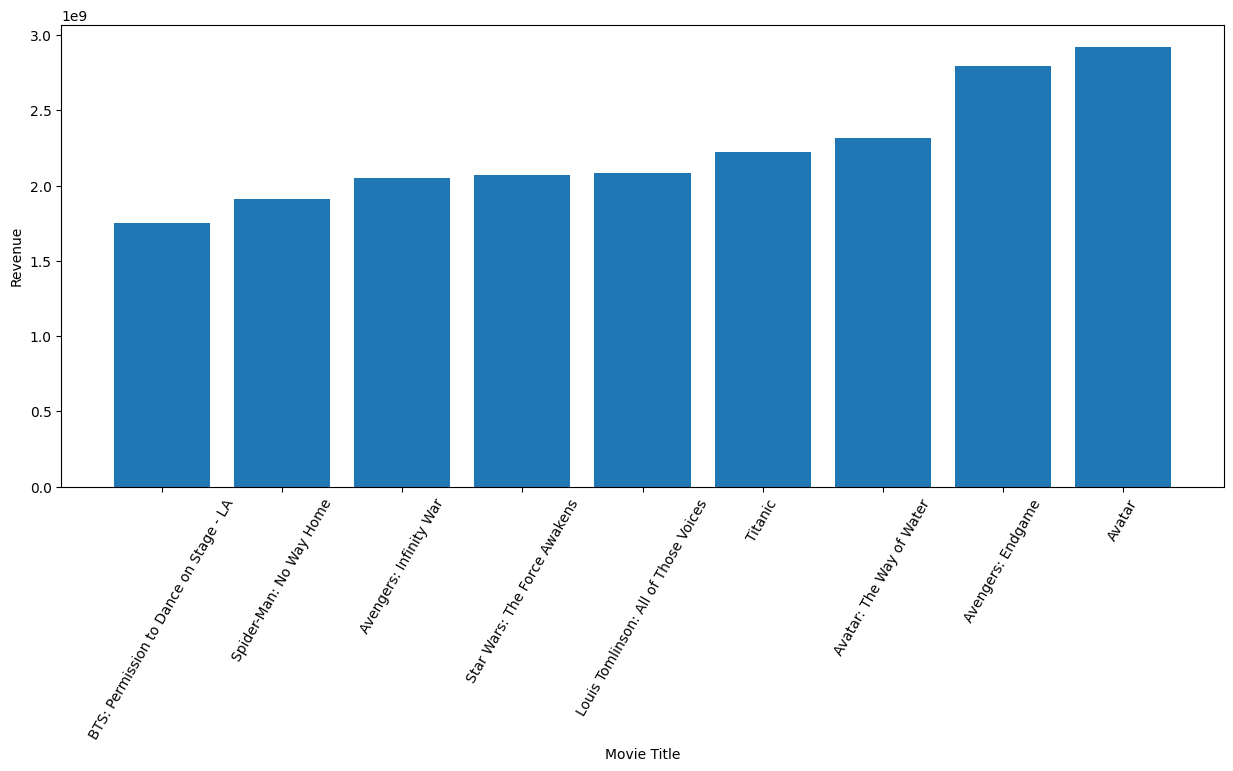

In [15]:
plt.figure(figsize=(15,6))
# Create a bar plot
plt.bar(top_10_revenues['names'], top_10_revenues['revenue'])

# Set the x-axis labels
plt.xticks(rotation=60)

# Label the axes
plt.xlabel('Movie Title')
plt.ylabel('Revenue')

# Show the plot
plt.show()

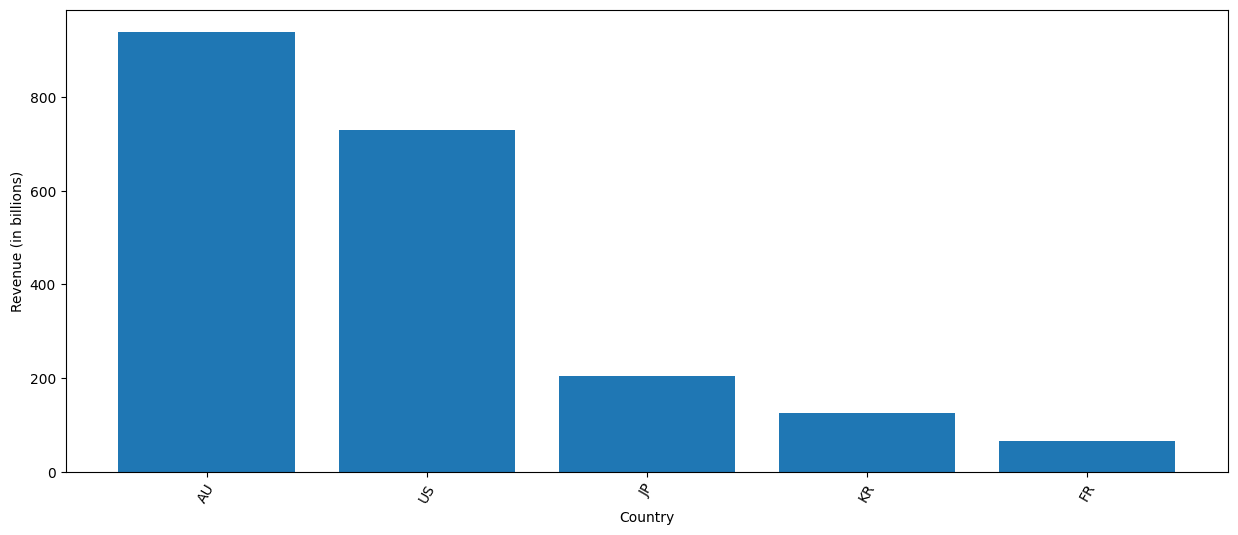

In [16]:
revenue_by_country = Movies.loc[:, ['country', 'revenue']]
revenue_by_country = revenue_by_country.groupby('country').sum()
top_5_countries = revenue_by_country.nlargest(5, 'revenue')

plt.figure(figsize=(15,6))
# Create a bar plot
plt.bar(top_5_countries.index, top_5_countries['revenue']/1000000000)


# Set the x-axis labels
plt.xticks(rotation=60)

# Label the axes
plt.xlabel('Country')
plt.ylabel('Revenue (in billions)')

# Show the plot
plt.show()

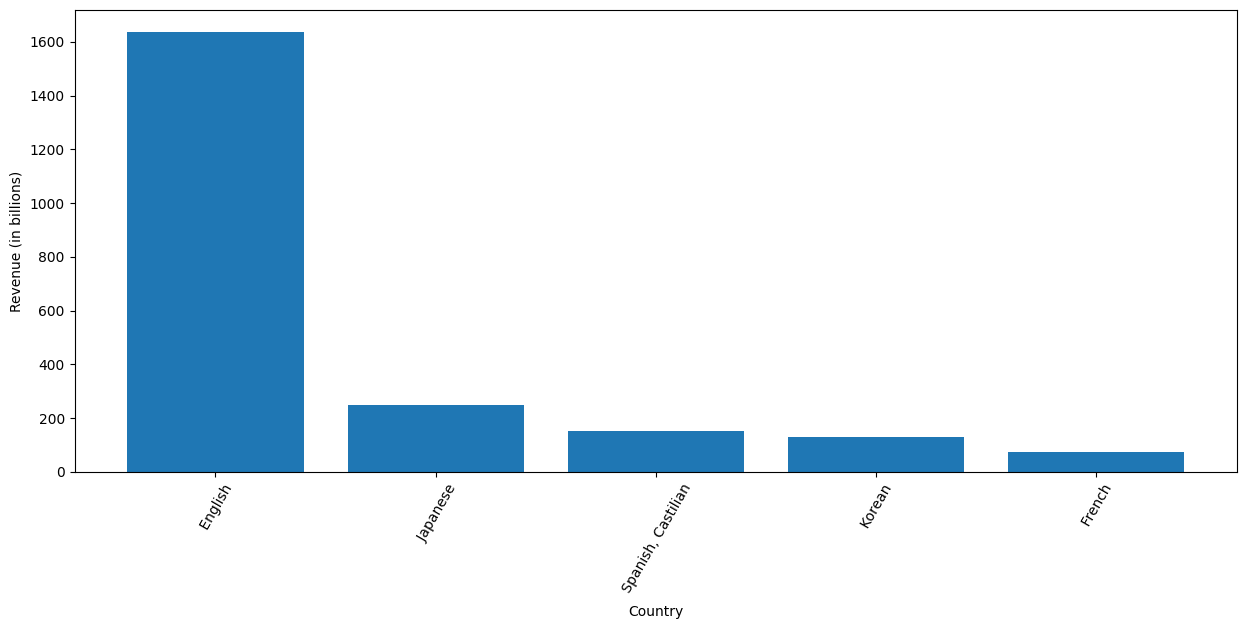

In [17]:
revenue_by_lang = Movies.loc[:, ['orig_lang', 'revenue']]
revenue_by_lang = revenue_by_lang.groupby('orig_lang').sum()
top_5_langs = revenue_by_lang.nlargest(5, 'revenue')

plt.figure(figsize=(15,6))
# Create a bar plot
plt.bar(top_5_langs.index, top_5_langs['revenue']/1000000000)

# Set the x-axis labels
plt.xticks(rotation=60)

# Label the axes
plt.xlabel('Country')
plt.ylabel('Revenue (in billions)')

# Show the plot
plt.show()

In [18]:
y= Movies["orig_lang"].value_counts().index.tolist()[0:9]
y

[' English',
 ' Japanese',
 ' Spanish, Castilian',
 ' Korean',
 ' French',
 ' Chinese',
 ' Italian',
 ' Cantonese',
 ' German']

In [19]:
x=Movies["orig_lang"].value_counts().unique()[0:9]
x

array([7381,  675,  388,  384,  282,  144,  142,  141,   89])

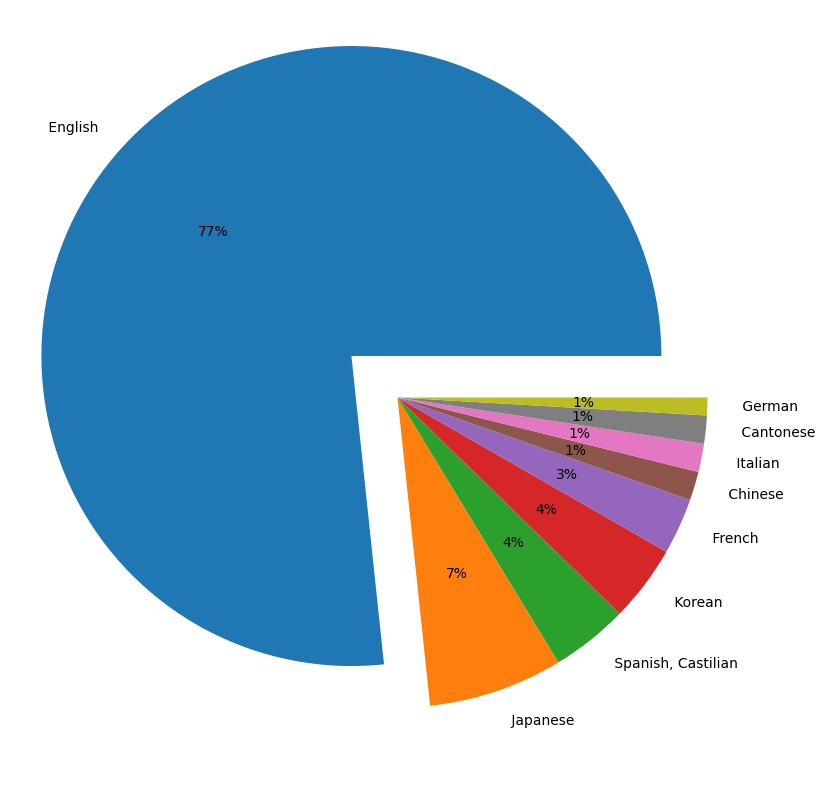

In [20]:
y
x
myexplode = [0.2, 0, 0, 0,0,0,0,0,0]
plt.figure(figsize=(10,15))
plt.pie(x, labels = y, explode = myexplode,autopct="%0.0f%%")
plt.show() 

In [21]:
v= Movies["genre"].value_counts().index.tolist()[0:9]
v

['Drama',
 'Comedy',
 'Drama,\xa0Romance',
 'Horror',
 'Horror,\xa0Thriller',
 'Comedy,\xa0Romance',
 'Documentary',
 'Action,\xa0Thriller',
 'Comedy,\xa0Drama']

In [22]:
w=Movies["genre"].value_counts().unique()[0:9]
w

array([556, 373, 268, 258, 202, 187, 131, 122, 121])

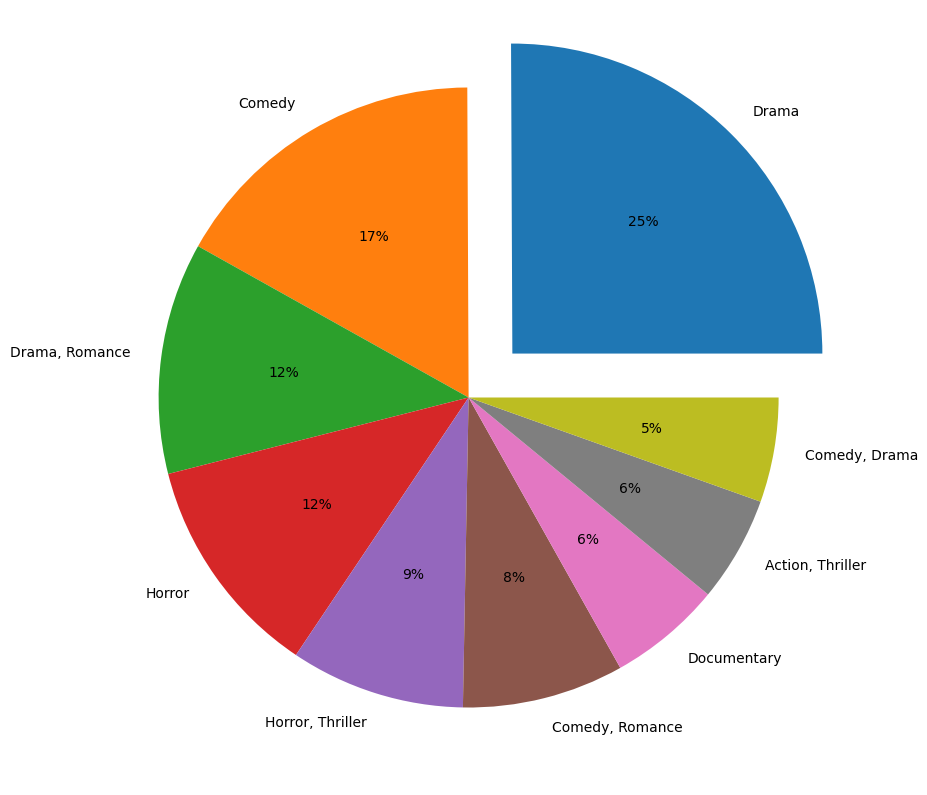

In [23]:
v
w
myexplode = [0.2, 0, 0, 0,0,0,0,0,0]
plt.figure(figsize=(10,15))
plt.pie(w, labels = v, explode = myexplode,autopct="%0.0f%%")
plt.show() 

In [24]:
Movies["date_x"].dt.year.value_counts().sort_index()

1903      1
1907      1
1915      2
1920      1
1923      3
       ... 
2019    465
2020    448
2021    618
2022    935
2023    373
Name: date_x, Length: 99, dtype: int64

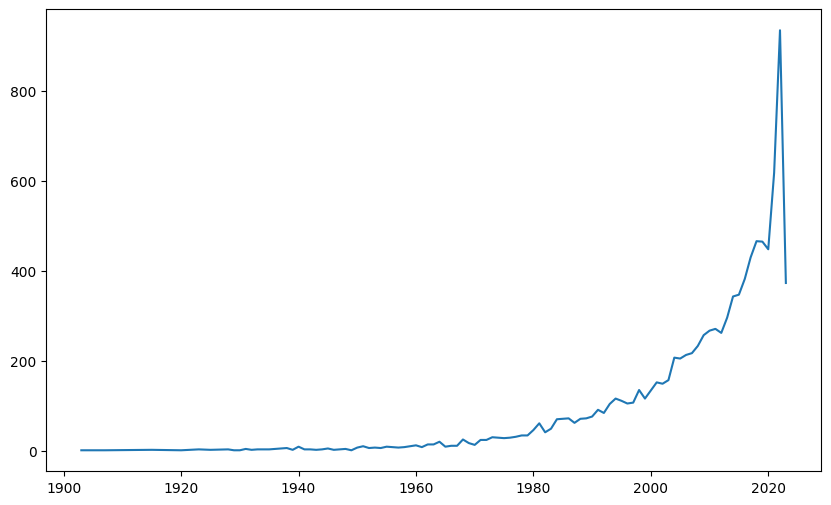

In [25]:
plt.figure(figsize=(10,6))
plt.plot(Movies["date_x"].dt.year.value_counts().sort_index())

In [26]:
genre_counts = Movies["genre"].value_counts()
genres=genre_counts[genre_counts >10].index
genre_averages = Movies.groupby('genre').score.mean()
x= genre_averages.loc[genres].sort_values(ascending= False).head(10)

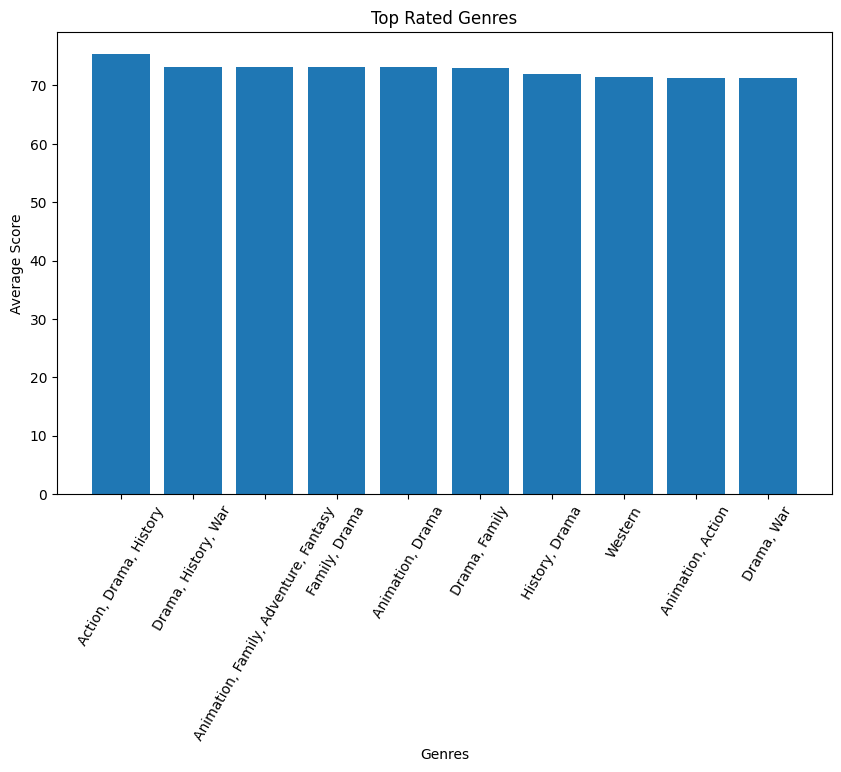

In [27]:
plt.figure(figsize=(10,6))
plt.bar(x.index,height=x)
plt.title('Top Rated Genres')
plt.xlabel('Genres')
plt.ylabel('Average Score')
plt.xticks(rotation=60)
plt.show()

## Source

www.imdb.com